# Analytical Paper 10
**Fluid Earth: GEOL 3820**

Discuss the physics of heat conduction and its application to temperature profiles and warming in permafrost.

### Technical Prerequisites
* Students should be able to run a Python cell in a Jupyter notebook 
* Familiarity with defining variables in Python recommended 

### Conceptual Prerequisites
* Students should have a strong grasp of derivatives and integrals. 
* Students should be familiar with Fourier Transport Laws
* Students should be familiar with equations that govern diffusion

### Learning Goals
* Students will be able to define a variable, run notebook cells, call defined functions, create arrays and plot figures in python. 
* Students will be able to create figures that describe how changing thermal conductivity affects thermal profiles in the upper crust.
* Students will be able to use figures they have created to augment their writing 
* Students will be able to list the variables that control thermal diffusion
* Students will be able to apply what they know about diffusion to describe hillslope evolution. 

### 1. Steady state temperature profiles: 
Consider three steady geothermal profiles in the upper 100 m below the ground surface. You will plot the profiles for each of the three cases listed below.  

#### Primer on discretization of the solution to Fourier's Law

In 1D space, Fourier's Law is of the form:
    $q = -k\frac{\textrm{d}T}{\textrm{d}y}$, 
    where $q$ is heat flux, $T$ is temperature, $k$ is a constant term describing 
    thermal conductivity, and $y$ is distance (depth in this case).
    
Analytically, we use integration to find temperature as a function of depth.
We would then use the initial conditions to solve for unknown constants.
This problem is left as an exercise for the user. 

Numerical evaluation with a computer requires us to transform the continuous 
solution into its discrete equivalen
ts (computers do not have infinite memory!)

One common approach is to employ Euler's method to estimate the solution (the 
function for temperature that we seek to define the temperature profile).
This method provides an approximation of the solution, however the code can
be written to provide sufficient precision to represent its true continuous
form, which we would arrive upon directly/analytically through integration.


We start with $\frac{\textrm{d}T}{\textrm{d}y} = -q/k$, which we approximate by $\frac{\textrm{d}T}{\textrm{d}y} = \frac{T(y_{n+1}) - T(y_n)}{y_{n+1} - y_n}$
for each step along the depth profile. The step size defines the precision of 
the approximation. If we have an initial value for $T$ at the surface, we can now use this value 
to solve for each subsequent $T$ with depth.

You also will need a starting value for $q$ in order to solve the equations.

#### a)

Run the following function for the case where heat is flowing upward by conduction at a constant, steady rate. Note that you will need to change the value of k, which is the thermal conductivity in ($\frac{W}{mK}$).

***To run a cell: cntl+enter***

In [1]:
##Importing the packages needed to run our code 
import numpy as np # Numpy is a mathematical package
import matplotlib.pyplot as plt #matplotlib allows us to plot figures
import matplotlib.axes as axes
import matplotlib.animation as animation # to make a movie
degree = u"\u00b0" # unicode symbol for degree for labeling plots nicely
print('modules imported')

modules imported


In [2]:
##DO NOT EDIT THIS FUNCTION!!!

#This is our function to integrate Fourier's law of heat transport:
##See below for definitions of input variables

def solve_FourierLaw1D(dy,y0,yf,T0,q,k):

    import numpy as np 
    
    n_steps = int((yf-y0)/dy) #number of depth intervals where we solve for T
    y = y0 #setting our current depth to be the inital depth given to the function
    T = T0 #setting our current temperature to be the inital temp. given to the function
    
    """Creating empty arrays for T and y to keep the code fast. These arrays will be the same
    length as the number of steps we have."""
    
    TT = np.zeros(n_steps) 
    yy = np.zeros(n_steps)
    TT[0] = T #Setting the first T value (surface) to be T0
    yy[0] = y #Setting the first y value to be y0
    
    #Loop through all of our steps to solve for T
    
    for n in range(n_steps-1): #because we already have a T at the top of our layer, we need one less step
        y = y+dy #update y to be current depth
        T = T-((q/k)*dy) #calculate T at current depth using Fourier's law
        TT[n+1] = T #assign T values to our T array
        yy[n+1] = y #assign y values to our y array
         
    return TT,yy

print('function defined')

function defined


In the cell below You will need to enter values for y0, yf, T0, and k. We have given a value of q (the heat flux)
at 55.5 W/m^2, but feel free to play with this!

Additionally, we have set a value for dy for you, but feel free to play around with different values of dy. Think logically about what this step size means when choosing a value.

In [5]:
q = -55.5 #heat flux in W/m^2
dy = 0.1 # #dy is the step size. insert value for dy here in m
y0 = "Enter initial elevation" #delete quotes and enter elevation at surface/top of layer in m
yf = "Enter final elevation" #delete quotes and elevation at the base of your layer in m
T0 = "Enter temperature at surface" #delete quotes and enter temperature at Earth's surface/top of layer in K
k = "Enter thermal conductivity" #delete quotes and enter thermal conductivity in W/mK

print('y0,yf,T0,k: %s, %s, %s, %s' %(y0,yf,T0,k))

y0,yf,T0,k: Enter initial elevation, Enter final elevation, Enter temperature at surface, Enter thermal conductivity


**Why does q have a negative value?**

To enter your answer, double click on this cell and enter your answer below.

Now to run the code with all of these values as inputs. The output will be two vectors. The first vector is of temperatures, and the second vector is the depth at which those temperatures occur.

In [8]:
T,y = solve_FourierLaw1D(dy,y0,yf,T0,q,k) # this uses the function defined above
T

TypeError: unsupported operand type(s) for -: 'str' and 'str'

**Now plot your results!**

You should plot your results for the constant k case. You will need to fill in a title and axis labels for your plot. Note that we have used the plt.plot command that we loaded in at the beginning of our code. T is our array of x-values to plot and y is our array of y-values. You can (and should!) use this template in future plotting throughout this assignment. The following code will save your figure to the binder, you need to download it to your computer. 

In [ ]:
#Copy and paste this block of code as a template for future plotting.

Title = 'My title goes here' #Insert a plot title within the single quotations.
Xlabel = 'This is my x axis' #Insert an x-axis label.
Ylabel = 'This is my y axis' #Insert a y-axis label.

#This next block of code plots this figure. The plt here is from our matplotlib import at the beginning.
plt.plot(T,y,'b-',linewidth = 2) #T and y are our x and y arrays; 'b-' sets the plotting style to be a blue solid line
plt.gca().invert_yaxis() #inverts our y axis so that 0 is at the surface
plt.title(Title) #Plots a title
plt.xlabel(Xlabel) #Plots the x-axis label
plt.ylabel(Ylabel) #Plots the y-axis label
plt.savefig('Your file name here.png') #Saves your figure! Replace the Your file name here with a file name
plt.show() #Shows our plot inline below


#### b)
Now run the function for the case where the upper 50 m layer has a lower thermal conductivity than the layer below. Note that for this case you will need to run the function twice for the two different thermal conductivities and then combine your temperature profiles into one plot.

In [ ]:
#Setting new k value for upper 50 m
k_upper = "Enter value for k" #Thermal conductivity for upper 50 m - delete quotes
y0 = "Enter starting y" #Starting y - delete quotes
yf = "Enter ending y" #Ending y - delete quotes

#Running function for upper 50 m
T_upper,y_upper = solve_FourierLaw1D(dy,y0,yf,T0,q,k_upper)

#Setting new k value and initial conditions for lower 50 m
k_lower = "Enter value for k" #Thermal conductivity for lower 50 m - delete quotes
y0 = "Enter starting y" #Starting y - delete quotes
yf = "Enter ending y" #Ending y - delete quotes
T0_new = T_upper[-1] #Setting our new T0 to be the deepest value from the function above

#Running function for lower 50 m
T_lower,y_lower = solve_FourierLaw1D(dy,y0,yf,T0_new,q,k_lower)

#Concatenating y and T arrays into one for plotting purposes
T = np.concatenate([T_upper,T_lower])
y = np.concatenate([y_upper,y_lower])

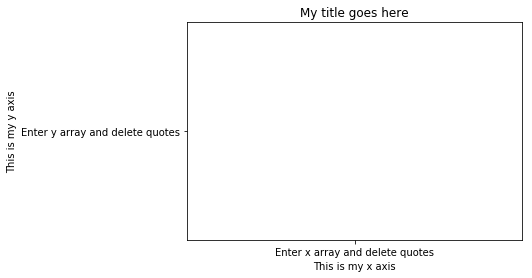

don't forget to download this figure to your computer.


In [9]:
#Plotting our new profile with variable k:

Title = 'My title goes here' #Insert a plot title within the single quotations.
Xlabel = 'This is my x axis' #Insert an x-axis label.
Ylabel = 'This is my y axis' #Insert a y-axis label.

plt.plot("Enter x array and delete quotes","Enter y array and delete quotes",'b-',linewidth = 2) #Plotting the function: you should enter the x and y arrays you want to plot! Refer to the plotting above if you need help
plt.gca().invert_yaxis() #inverts our y axis so that 0 is at the surface
plt.title(Title)
plt.xlabel(Xlabel)
plt.ylabel(Ylabel)
plt.savefig('figure2.png')
plt.show()

print("don't forget to download this figure to your computer.")

#### c)
Finally, run the function for the case where the upper 50 m layer has a higher thermal conductivity than the layer below. Notice that we did not give you any code below. You will need to copy and paste relevant parts from part (b) to run and plot the results of your function. 

In [ ]:
## In this section you should solve Fourier's Heat Transport for both sections separately, and then concatenate the arrays.
## Use part b as a guide 

In [ ]:
## Plot your results. Use the plotting function from part a!

**Describe profile shapes**

Please explain in words why the three profiles have the shapes that they do. Reference Fourier's law of heat conduction and the three plots you just made in your explanation. To add your answer, double click on this cell and enter your answer below.

### 2. Snake writhing in an exponential funnel
Below we is a code to plot temperatures in the top 15 m of a soil (A snake in an exponential funnel). Run the next two cells to play the video. 

In [ ]:
### set up movie of snake in an exponential funnel ###

### initialize variables ###
MAT = -10 # mean annual temp in degrees C
dT = 15 # change in temp in degrees C
k = 1.2 # thermal conductivity in W/(m-K) (value for top 30 m)
kappa = 1 * 1e-6 # thermal diffusivity in m^2/sec
period = 3.154*1e7 # one year in seconds
zstar = np.sqrt((kappa * period) / np.pi) # depth decay scale

#### initialize arrays ###
zsteps = 50 # number of steps in depth array
tsteps = 100 # number of steps in time array

# initialize depth (z) array from 0-15 m with "steps" depth steps
zmax = 15
z = np.linspace(0,zmax,num=zsteps) # depth, top 15 m

# initialize time array from 0 to period with "steps" time steps
time = np.linspace(0,period,num=tsteps) # time, 1 year in 30 time steps

# initialize temperature array of same size as depth * time
Temp = np.ndarray(shape=(tsteps,zsteps), dtype=float) # temperature in degrees C

### calculate temperature min/max bounds ###
Tmin = MAT - (dT * np.exp(-z/zstar)) # calculate geotherm for min temp
Tmax = MAT + (dT * np.exp(-z/zstar)) # caclulate geotherm for max temp

# set up the movie
fig, ax = plt.subplots(1,1,figsize=(6,4)) # open a blank figure
writer = animation.FFMpegWriter(fps=15) # initialize the movie writer
writer.setup(fig, 'snake.mp4', dpi=300) # set up the movie writer to capture the figure frames

### calculate geotherms ###
# loop through time array calculating a geotherm at each time step for all of the depth array and plotting the result.

# loop through time array. i is the index. v is the value
for i,v in enumerate(time):
    
    # calculate temp at this timestep for all of z
    Temp[i,:] = MAT + (dT * np.exp(-z/zstar)) * np.sin(((2*np.pi*time[i])/period)-(z/zstar))
    
    # set up plotting
    plt.ylim(0,zmax) # set limits for Y axis
    plt.xlim(-25,5,5) # set limits for X axis
    plt.gca().invert_yaxis() # invert the Y axis so it plots with 0m depth (Earth's surface) at the top
    plt.xlabel('Temperature ('+degree+'C)') # label the X axis
    plt.ylabel('Depth (m)') # label the Y axis
    plt.plot(Tmin,z,color='black',linewidth=.75) # add geotherm boundary for max temp to plot
    plt.plot(Tmax,z,color='black',linewidth=.75) # add geotherm boundary for min temp to plot
    plt.text(0.05,0.05,np.str(np.int(v/86400))+' days',transform=ax.transAxes) # add text to graph
    #plt.axvline(0,0,15,color='black',linestyle='--') # plot a vertical line at 0C from 0-15m depth (black, dashed line)
    
    # plot geotherm at this timestep
    plt.plot(Temp[i,:],z,linewidth=1)


    # save the figure as one frame to the movie file
    writer.grab_frame()
    
    # optionally, uncomment the next line to save the figure as a png
    #plt.savefig('plot_title.png',dpi=300)
    
    # clear the figure so geogetherms aren't over printed (i.e., one geotherm per frame)
    plt.clf()
    

# finish writing and close the movie file
writer.finish() 

print('movie made')

In [ ]:
%%HTML
<video width="800" height="600" loop=True controls>
  <source src='snake.mp4' type="video/mp4">
</video>

**The graph below (from Bob and Suzanne Anderson’s $\textit{Geomorphology: Mechanics and Chemistry of Landscapes}$) shows temperature records collected from a borehole in Alaska between 1977 and 2003.**

![title](AndersonPermafrostGraph.png)

***For the cells below, double-click on the text and type your answer below***

#### a)
Please make observations about the shape of the curve above. How has the shape changed through time? Please also compare the snake in an expontial funnel movie and the plot above (Hint: be sure to pay attention to the y-scale).

#### b) 
Please write out the key variables associated with Fourier's Law (feel free to use latex if you are familiar), and infer the direction of heat flow above 30 m and below 40 m (i.e. upward or downward heat flux). 

#### c) 
Suppose you only had data from the year 2003 and therefore had no independent information about whether various points in the profile are warming, cooling, or maintaining a steady temperature. Based on the physics of heat conduction, predict whether the temperature at ∼35 meters depth likely increased, decreased, or stayed the same during the year 2004.

#### d) 
The data shown in the figure have been interpreted as indicating that the ground-surface temperature in this part of the arctic has warmed over the past few decades. Suppose, however, that you ONLY had data from the year 2003, and were therefore unable to directly assess the changes in the permafrost temperature over time. In such a case, a skeptic might argue that the shape of the curve in 2003 could just as easily be interpreted as resulting from differences in the thermal conductivity, $k$, at different depths in the profile, and therefore that the data do not prove that surface warming has occurred.  Based on the physics of heat conduction, would such an argument be justified? 

**Use your code from problem one to justify your answer by plotting differences in k to try to recreate the temperature curve from 2003.**

### 3. Hillslope Diffusion
**Apply the diffusion equation to a hill slope**

Imagine a soil-mantled hillslope of length L. The downslope flux of soil, $q_s$, in cubic meters of soil per year per unit contour width (i.e., in $m^2/yr$), is given by Gilbert’s Law: 
\begin{align} 
q_{s} = -K_{d} \frac{\partial z}{\partial x}
\end{align}

where $z$ is land surface height relative to the base of the hill [L], $x$ is horizontal distance from
the top of the hill [L], and $K_d$ is a transport coefficient [L^2/T]. Assume that the hillslope is
eroding at a steady rate $E$, such that the downslope flux of soil per unit width is also equal
to:

\begin{align} 
q_{s} = Ex
\end{align}

#### a) 
Use this information to derive an equation that gives land height, z, as a function of position along the hill, x. (Hint: you’ll need to integrate). To enter your answer, double click this cell and enter your answer below. 

#### b) 
Use questions 1 and 2 as a hint to make a plot that shows the hillslope profile (z versus x) for a 100 m long hill with an erosion rate of $2*10^-5 m^2 / yr$ and a transport coefficient $K_{d} = 0.004 m^2/yr$. Note that we have commented the lines of code for you. Your job is to write the actual code before the commented section. 

In [ ]:
# In this cell define your constants

    #Length of hillslope (m)
    #maximum height of hillslope (m)
    #Erosion rate (m^2/yr)
    #transport coefficient (m^2/yr)
    #spatial step (m)
    

In [ ]:
# In this cell set up your arrays and solve for z
   #set up x domain. use x = np.arange(startingvalue,endingvalue,spatialstep)
    
  #solve for z using your equation you integrated from above

In [ ]:
# In this cell plot your results. You may copy and then update the plotting template from question 1. Think about how you want your y-axis oriented.


#### c)
Please describe the hillslope with words. Enter your answer by double clicking on this cell. 

### 4. Save Output

1. Download all your figures to your computer.
2. Export this notebook to an html file (File --> Export Notebook As --> HTML).